
    SYS Unit cell
    SYS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    SYS Number of periodic dimensions: 3
    SYS Cell parameter     a:    46.9370
    SYS Cell parameter     b:    44.1214
    SYS Cell parameter     c:    45.1826
    SYS Cell parameter alpha:   90.00000
    SYS Cell parameter  beta:   90.00000
    SYS Cell parameter gamma:   90.00000
    SYS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


  XYZH5 Loading XYZ file './out_unbiased2.xyz' into 'trajectory/pos' of HDF5
  XYZH5 file 'trajectory-out-unbaised2.h5'
[  1   2   4   5   7   8  10  11  13  14  16  17  19  20  22  23  25  26
  28  29  31  32  34  35  37  38  40  41  43  44  46  47  49  50  52  53
  55  56  58  59  61  62  64  65  67  68  70  71  73  74  76  77  79  80
  82  83  85  86  88  89  91  92  94  95  97  98 100 101 103 104 106 107
 109 110 112 113 115 116 118 119 121 122 124 125 127 128 130 131 133 134
 136 137 139 140 142 143 145 146 148 149 151 

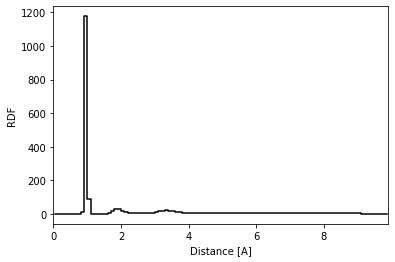

In [13]:
import numpy as np 
from yaff import *
#system = System.from_file('../training-set/dataset_1593.xyz', rvecs=np.diag([23.46511000, 23.46511000, 23.46511000])*angstrom)
#system = System.from_file('./out7.xyz', rvecs=np.diag([46.93703259338623,44.1214358830923,45.18259257711876])*angstrom)
system = System.from_file('./out_unbiased2.xyz', rvecs=np.diag([46.93703259338623,44.1214358830923,45.18259257711876])*angstrom)

# Create a HDF5 file and convert the XYZ file to arrays in the HDF5 file
import h5py as h5
with  h5.File('trajectory-out-unbaised2.h5', mode='w') as f:
    system.to_hdf5(f)
    xyz_to_hdf5(f, './out_unbiased2.xyz')

    # Select two lists of atom indexes based on the ATSELECT rules '1' and '8'
    select0 = system.get_indexes('1')
    select1 = system.get_indexes('2')
    print(select0)

    # Note. The remainder of the example may be moved to a separate script if
    # that would be more convenient, e.g. in case different RDFs must be generated.
    # This would avoid repetetive conversion of the XYZ file.

    # Create the RDF.
    rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=100000, select0=select0, select1=select1)
    # One may make plots with the rdf object ...
    rdf.plot()
    # ... or access the results as Numpy arrays
    print()
    print('RDF DATA FOR THE X-AXIS [A]')
    print(rdf.d/angstrom)
    print()
    print('RDF DATA FOR THE Y-AXIS')
    print(rdf.rdf)
    #     rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=100000, select0=select0, select1=select0)
    # One may make plots with the rdf object ...
    #     rdf.plot()
    #     rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=100000, select0=select1)
    #     # One may make plots with the rdf object ...
    #     rdf.plot()

In [17]:
# Create the RDF.
print(select0, select1)
rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=100000, select0=select0, select1=select1)
# One may make plots with the rdf object ...
rdf.plot()
# ... or access the results as Numpy arrays
print()
print('RDF DATA FOR THE X-AXIS [A]')
print(rdf.d/angstrom)
print()
print('RDF DATA FOR THE Y-AXIS')
print(rdf.rdf)


[  1   2   4   5   7   8  10  11  13  14  16  17  19  20  22  23  25  26
  28  29  31  32  34  35  37  38  40  41  43  44  46  47  49  50  52  53
  55  56  58  59  61  62  64  65  67  68  70  71  73  74  76  77  79  80
  82  83  85  86  88  89  91  92  94  95  97  98 100 101 103 104 106 107
 109 110 112 113 115 116 118 119 121 122 124 125 127 128 130 131 133 134
 136 137 139 140 142 143 145 146 148 149 151 152 154 155 157 158 160 161
 163 164 166 167 169 170 172 173 175 176 178 179 181 182 184 185 187 188
 190 191] [  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159
 162 165 168 171 174 177 180 183 186 189]


ValueError: When max_sample is given and end is negative, a file must be present.

In [10]:
rdf = RDF(10*angstrom, 0.1*angstrom, f, max_sample=100000, select0=select0)
# One may make plots with the rdf object ...
rdf.plot()


ValueError: When max_sample is given and end is negative, a file must be present.

In [14]:
rdf = RDF(10*angstrom, 0.1*angstrom, f, select0=select1)
# One may make plots with the rdf object ...
rdf.plot()

AttributeError: 'RDF' object has no attribute 'rdf'

<Figure size 432x288 with 0 Axes>